### Offspring Phenotype Model

We start from a simplified form of the Lobster Boys’ equation (eqn. 4), keeping only the genotype and maternal-phenotype terms:

$$
z' = \alpha z + \gamma (m + \varepsilon)
$$

where

- z' = offspring phenotype
- z = genotype-based expectation  
- m = mother’s phenotype  
- $\varepsilon$ = noise  
- $\alpha, \gamma$ = weights on genotype vs. maternal influence  

---

### Reformulation

- Define the **maternal deviation**:

$$
\delta = m - z'
$$
so that :
$$
m = z' + \delta
$$

- We also separate mutation-related noise $\varepsilon_{m}$ from phenotypic-inheritance noise $\varepsilon_{p}$.  
- Thirdly we allow for a predetermined parameter $\gamma$: the 'decay rate'; controls how the signal is 'forgotten' or allowed to decay in the offspring. This we truncate to (0,1); so that the signal cannot become 2x ; so the siignal cant be amplified 
- Finally we define a evolvable 'weight' term $\alpha$: determines how much importance to give each term of the equation

The new formulation becomes:

$$
Z' = (1- \alpha)(z + \varepsilon_{m}) + \alpha(\gamma (\delta + \varepsilon_{p}))
$$

---

### Interpretation

- **Genetic baseline**: offspring always inherit \(z + e_m\) (genotype + mutation).  
- **Maternal influence**: with weight \(\gamma\), they copy their mother’s *deviation* from the genetic baseline \delta plus noise from phenotypic inheritance (\(e_p\)).  

Cases:  
- If $\gamma$ = 1: offspring copy mother as faithfully as possible.  
- If $\gamma$ = 0: offspring ignore mother’s phenotype and rely only on long-term genetic information.  
- If 0 < $\gamma$ < 1: maternal effects decay geometrically across generations (e.g. $\gamma^t$ after t generations).  



### $$
\delta = m - P
$$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

import statistics

In [2]:
def w(z_combined):
    return (np.exp(-z_combined**2 /(10))) 

def z_dist(z1, env_opt):
    x0 = env_opt
    return ((np.sqrt((x0 - z1)**2 )))

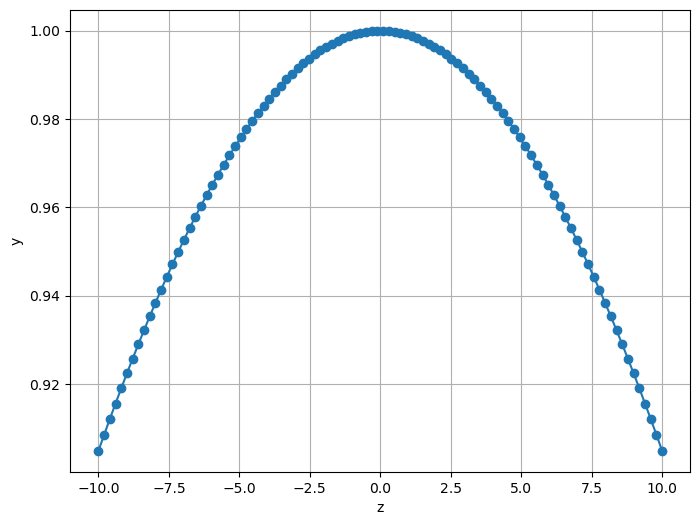

In [3]:
#
z_combined = np.linspace(-10,10,100)
y=np.exp(-z_combined**2 /(1000))

# Plot staying probability vs equilibrium gamma
plt.figure(figsize=(8,6))
plt.plot(z_combined, y, '-o')
plt.xlabel('z')
plt.ylabel('y')

plt.grid(True)
plt.show()

In [103]:
# Define states
states = ["Dry", "Wet"]
n_states = len(states)

sp =0.99 #staying probability

# Transition probability matrix
Transition_probs = np.array([
    [sp, (1-sp)],  # From Dry
    [(1-sp), sp]   # From Wet
])

# Simulate environment over time
n_gen = 1000

#baseline maternal effect
population_size= 1000

env_sequence = []
current_state = 0 

Env = np.array([
    -0.9,  
    0.5,  
 ])


In [104]:
##define all sigmas
sigma_mut=0.5
sigma_mat =0.5
sigma_alpha= 0
gamma = np.arange(0, 1.1, 0.1) 

alpha = np.random.uniform(low=0, high=1, size=population_size)


In [105]:
epsilon_m = np.random.normal(0, sigma_mut, size=population_size)
epsilon_p = np.random.normal(0, sigma_mat, size=population_size)
epsilon_alpha= np.random.normal(0, sigma_alpha, size=population_size)

gamma=0.5

In [106]:
z_a_t= np.random.uniform(low=-1, high=1, size=population_size) 

m_a_t = np.random.uniform(low=-1, high=1, size=population_size)

P = np.random.uniform(low=-10, high=10, size=population_size)

#Initial values for maternal deviation and offspring phenotype
delta = m_a_t - P


P = (1-alpha)*(z_a_t) + alpha *(gamma) * (delta)


In [107]:
current_state = 0
current_env = Env[current_state] 

# Transform phenotype with rP_espect to environment
P_com = z_dist(P, current_env)

# Calculate fitness
fitness = w(P_com)
relative_fitness = fitness / fitness.mean()
    

In [108]:
current_state = 0

gen_stats = {
    'Generation': 0,
    'Environment': Env[current_state],
    'Mean_fitness': fitness.mean(),
    'Std_fitness': fitness.std(),
    'Mean_phenotype': P.mean(),
    'Std_phenotype': P.std(),
       
    # New columns stats
   
    'Mean_gen_plus_mut': z_a_t.mean(),
    'Std_gen_plus_mut': z_a_t.std(),
    'Mean_maternal_phen_werror':m_a_t.mean(),
    'Std_maternal_phen_werror':m_a_t.std(),
    'Mean_maternal_dev_werror': delta.mean(),
    'Std_maternal_dev_werror': delta.std(),
    'Mean_alpha_werror': alpha.mean(),
    'Std_alpha_werror': alpha.std()}
    
results_df = pd.DataFrame()
# Append row to RESULTS_DF
results_df = pd.concat([results_df, pd.DataFrame([gen_stats])], ignore_index=True) #wrap it in a list []

In [109]:
results_df

,Generation,Environment,Mean_fitness,Std_fitness,Mean_phenotype,Std_phenotype,Mean_gen_plus_mut,Std_gen_plus_mut,Mean_maternal_phen_werror,Std_maternal_phen_werror,Mean_maternal_dev_werror,Std_maternal_dev_werror,Mean_alpha_werror,Std_alpha_werror
0,0,-0.9,0.752491,0.246526,-0.022559,1.738348,-0.002774,0.568985,0.011042,0.58349,-0.004889,5.834836,0.509581,0.283248


In [110]:
z_a_t_mut = z_a_t + epsilon_m  # genertic
    
m_a_t_error = m_a_t + epsilon_p # maternal effect plus inheiritence error
    
delta =  m_a_t_error - P  

alpha_error = alpha + epsilon_alpha  # evolving alpha


P = (1 - alpha_error)*(z_a_t_mut) + (alpha_error)*(gamma) * (delta)


In [111]:

optimum_A_over_time=[]

mean_phen_over_time = []
std_phen_over_time = []
mean_mat_over_time  = []
std_mat_over_time  = []

mean_fitness_over_time = []
std_fitness_over_time = []

phenotype_over_time = []
std_phen_over_time= []

mean_delta = []
std_delta = []
mean_gamma = []
std_gamma = []

population_size = 1000
current_state = 0 


# Initialize the results DataFrame
results_df = pd.DataFrame()

# Initialize environment and population
population_size = 1000
env_sequence = []

# Loop through generations
for t in range(1, n_gen + 1):
    env_sequence.append(states[current_state])  # Log current environment
    current_state = np.random.choice([0, 1], p=Transition_probs[current_state])
    current_env = Env[current_state]  # Optimum values (e.g., for trait A)
    optimum_A_over_time.append(current_env)


    # Transform phenotype with rP_espect to environment
    P_com = z_dist(P, current_env)

    # Calculate fitness
    fitness = w(P_com)
    relative_fitness = fitness / fitness.mean()
    
    # Create generation DataFrame
    df = pd.DataFrame({
        'gen_plus_mut': z_a_t_mut,
        'Phenotype': P,
        'gamma': gamma,
        'maternal_phenotype_werror': m_a_t_error,
        'maternal_deviation': delta,
        'alpha_w_error': alpha_error,
        'fitness': fitness,
        'relative_fitness': relative_fitness})

    gen_stats = {
    'Generation': t,
    'Environment': current_env,
    'Mean_fitness': df['fitness'].mean(),
    'Std_fitness': df['fitness'].std(),
    'Mean_phenotype': df['Phenotype'].mean(),
    'Std_phenotype': df['Phenotype'].std(),
        
    # New columns statsdelta_error
     'Mean_maternal_phen_werror': df['maternal_phenotype_werror'].mean(),
    'Std_maternal_phen_werror': df['maternal_phenotype_werror'].std(),
    'Mean_gen_plus_mut': df['gen_plus_mut'].mean(),
    'Std_gen_plus_mut': df['gen_plus_mut'].std(),
    'Mean_maternal_deviation': df['maternal_deviation'].mean(),
    'Std_maternal_deviation': df['maternal_deviation'].std(),
    'Mean_alpha_werror': df['alpha_w_error'].mean(),
    'Std_alpha_werror': df['alpha_w_error'].std()}
    

    # Append row to RESULTS_DF
    results_df = pd.concat([results_df, pd.DataFrame([gen_stats])], ignore_index=True) #wrap it in a list []
    #is because pd.DataFrame() expects an iterable (like a list) of rows/dictionaries to create a DataFrame

    # Sample next generation (with fitness-proportional reproduction)
    sampled_df = df.sample(n=population_size, weights=df['relative_fitness'], replace=True)

    
    # Update population for next generation
    z_a_t_mut = sampled_df['gen_plus_mut'].values # the inheirited genetic component inheirits the mutation
    P = sampled_df['Phenotype'].values
    alpha_error = sampled_df['alpha_w_error'].values
    m_a_t_error = sampled_df['maternal_phenotype_werror'].values


    #Sample variances
    epsilon_m = np.random.normal(0, sigma_mut, size=population_size)
    epsilon_p = np.random.normal(0, sigma_mat, size=population_size)
    epsilon_alpha= np.random.normal(0, sigma_alpha, size=population_size)
    
    # Compute maternal effect (kept constant across generations)
    
     
    z_a_t_mut = z_a_t_mut + epsilon_m  # genertic

    m_a_t_error = m_a_t_error + epsilon_p
    
    delta =  m_a_t_error - P

    
    alpha_error = alpha_error + epsilon_alpha  # evolving alpha

    #PHENOTYPE
    
    P = (1 - alpha_error)*(z_a_t_mut) + (alpha_error)*(gamma) * (delta)
    

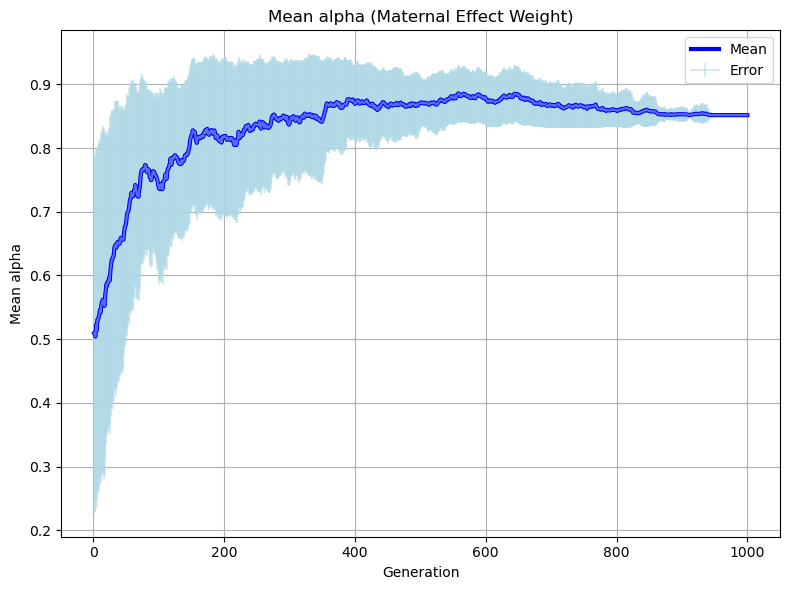

In [116]:
generations = results_df['Generation']

plt.figure(figsize=(8, 6))
plt.errorbar(generations, results_df['Mean_alpha_werror'], yerr=results_df['Std_alpha_werror'], 
             color='lightblue', alpha=0.5, label='Error')
plt.plot(generations, results_df['Mean_alpha_werror'], color='blue', linewidth=3, label='Mean')

plt.title('Mean alpha (Maternal Effect Weight)')
plt.xlabel('Generation')
plt.ylabel('Mean alpha')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

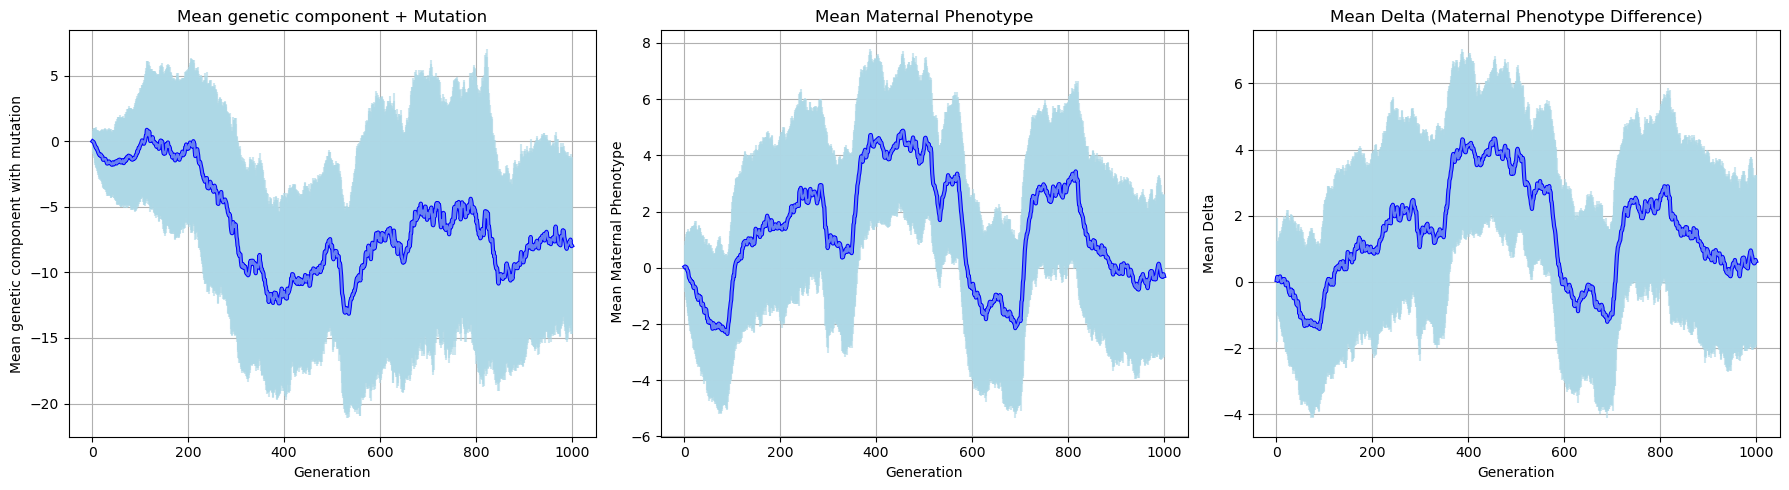

In [113]:

generations = results_df['Generation']

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Plot 1: Mean Gamma
axs[0].errorbar(generations, results_df['Mean_gen_plus_mut'], yerr=results_df['Std_gen_plus_mut'], alpha=0.6, color='lightblue')
axs[0].plot(generations, results_df['Mean_gen_plus_mut'], color='blue', linewidth=3)
axs[0].set_title('Mean genetic component + Mutation')
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Mean genetic component with mutation')
#axs[0].set_ylim(0, 1)
axs[0].grid(True)

# Plot 2: Mean Delta
axs[1].errorbar(generations, results_df['Mean_maternal_phen_werror'], yerr=results_df['Std_maternal_phen_werror'], alpha=0.6, color='lightblue')
axs[1].plot(generations, results_df['Mean_maternal_phen_werror'], color='blue', linewidth=3)
axs[1].set_title('Mean Maternal Phenotype')
axs[1].set_xlabel('Generation')
axs[1].set_ylabel(' Mean Maternal Phenotype')
axs[1].grid(True)

# Plot 3: Mean Delta
axs[2].errorbar(generations, results_df['Mean_maternal_deviation'], yerr=results_df['Std_maternal_deviation'], alpha=0.6, color='lightblue')
axs[2].plot(generations, results_df['Mean_maternal_deviation'], color='blue', linewidth=3)
axs[2].set_title('Mean Delta (Maternal Phenotype Difference)')
axs[2].set_xlabel('Generation')
axs[2].set_ylabel('Mean Delta')
axs[2].grid(True)


plt.tight_layout()
plt.show()


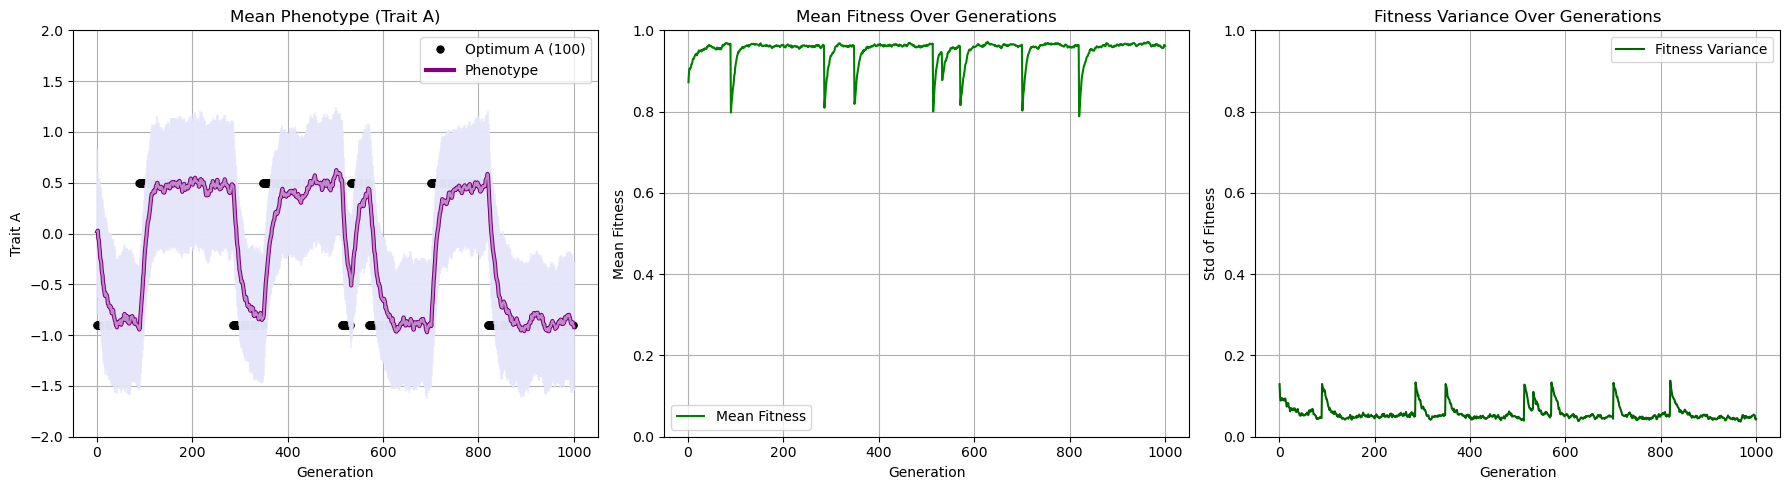

In [115]:
generations = results_df['Generation']

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Phenotype mean
axs[0].plot(optimum_A_over_time, linestyle='None', marker='o', markersize=5, color='black', label='Optimum A (100)')
axs[0].errorbar(generations,results_df['Mean_phenotype'], yerr=results_df['Std_phenotype'], 
                   color='lavender', alpha=0.6 ) 
axs[0].plot(generations, results_df['Mean_phenotype'], label='Phenotype', color='purple', linewidth=3)
axs[0].set_title('Mean Phenotype (Trait A)')
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Trait A')
axs[0].set_ylim(-2,2)
axs[0].grid(True)
axs[0].legend()

# Mean fitness
axs[1].plot(generations, results_df['Mean_fitness'], label='Mean Fitness', color='green')
axs[1].set_title('Mean Fitness Over Generations')
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Mean Fitness')
#axs[1].set_xlim(220,280)
axs[1].set_ylim(0,1)
axs[1].grid(True)
axs[1].legend()

# Variance (Std) of fitness
axs[2].plot(generations, results_df['Std_fitness'], label='Fitness Variance', color='darkgreen')
axs[2].set_title('Fitness Variance Over Generations')
axs[2].set_xlabel('Generation')
axs[2].set_ylabel('Std of Fitness')
axs[2].grid(True)
axs[2].set_ylim(0,1)
axs[2].legend()

plt.tight_layout()
plt.show()

Varying staying probability and finding final aloha values

In [ ]:
# Parameters
n_gen = 2000
population_size = 1000
Env = np.array([-0.9, 0.5])

sigma_mut = 0.4
sigma_mat = 0.2

sp_values = np.linspace(0, 1, 100)
equilibrium_gamma_means = []
eqm_gamma_std=[]

# Select 10 indices from 0 to 99 to save trajectories for
selected_indices = np.linspace(0, 99, 10, dtype=int)
selected_sp_values = sp_values[selected_indices]

# To store mean gamma trajectories for selected sp values
gamma_trajectories = {sp: [] for sp in selected_sp_values}

for sp in sp_values:
    Transition_probs = np.array([
        [sp, 1-sp],
        [1-sp, sp]
    ])
    
    current_state = 0
    gamma = np.random.uniform(low=0, high=1, size=population_size)
    epsilon_m = np.random.normal(0, sigma_mut, size=population_size)
    epsilon_p = np.random.normal(0, sigma_mat, size=population_size)
    z_a_t = np.random.uniform(low=-1, high=1, size=population_size)
    m_a_t = np.random.uniform(low=-1, high=1, size=population_size)
    delta = (z_a_t + epsilon_m)-m_a_t 
    P = (z_a_t + epsilon_m) + gamma * (delta + epsilon_p)
    
    mean_gamma_over_time = []  # record mean gamma each gen if this sp is selected

    for t in range(1, n_gen + 1):
        current_state = np.random.choice([0, 1], p=Transition_probs[current_state])
        current_env = Env[current_state]
        
        P_com = z_dist(P, current_env)
        fitness = w(P_com)
        relative_fitness = fitness / fitness.mean()
        
        df = pd.DataFrame({
            'genetic_component': z_a_t,
            'gen_plus_mut': (z_a_t + epsilon_m),
            'Phenotype': P,
            'gamma': gamma,
            'maternal_phenotype': m_a_t,
            'delta': delta,
            'maternal_comp_werror': (delta + epsilon_p),
            'fitness': fitness,
            'relative_fitness': relative_fitness
        })
        
        sampled_df = df.sample(n=population_size, weights=df['relative_fitness'], replace=True)
        z_a_t = sampled_df['genetic_component'].values
        P = sampled_df['Phenotype'].values
        gamma = sampled_df['gamma'].values
        m_a_t = sampled_df['maternal_phenotype'].values
        
        delta =  m_a_t -P 
        epsilon_m = np.random.normal(0, sigma_mut, size=population_size)
        epsilon_p = np.random.normal(0, sigma_mat, size=population_size)
        P = (z_a_t + epsilon_m) + gamma * (delta + epsilon_p)

        # If this sp is in the selected set, record mean gamma
        if sp in gamma_trajectories:
            mean_gamma_over_time.append(np.mean(gamma))  # hash-based key-value stores--> look up python jargon sorrounding this 
    
    equilibrium_mean_gamma = np.mean(gamma)
    eqm_std_gamma = np.std(gamma)
    equilibrium_gamma_means.append(equilibrium_mean_gamma)
    eqm_gamma_std.append(eqm_std_gamma)
    
    # Save trajectory if selected
    if sp in gamma_trajectories:
        gamma_trajectories[sp] = mean_gamma_over_time


